# 04_基于配体的筛选：化合物相似度
## 本次目的
- 在本次中，我们熟悉了编码(描述符、指纹图谱)和比较(相似性度量)分子的不同方法。进一步地，我们通过 Lipinski’s rule of five 过滤ChEMBL数据库中的 VEGFR2 测试分子数据集，以相似性搜索的形式对 VEGFR2 抑制剂 Gefitinib 进行虚拟筛选

## 理论内容
- 分子相似性
- 分子描述符
- 分子指纹图谱
- 基于子结构的指纹
- MACCS指纹图谱
- 摩尔根指纹和圆形指纹
- 分子相似性度量
- Tanimoto系数
- Dice系数
- 虚拟筛选
- 利用相似性搜索进行虚拟筛选
- 富集图

## 实践
- 导入并绘制分子
- 计算分子描述符
- 1D分子描述符：分子量
- 2D分子描述符：MACCS指纹图谱
- 2D分子描述符：Morgan指纹图谱
- 计算分子相似性
- MACCS指纹图谱：Tanimoto和Dice相似度
- 摩尔根指纹图谱：Tanimoto和Dice相似度
- 利用相似性搜索进行虚拟筛选
- 将查询分子与数据集中的所有分子进行比较
- 相似度值的分布
- 将大多数相似的分子可视化
- 生成富集图
- 计算富集因子

## 理论
### 分子相似性
- 分子相似性是化学信息学中一个广为人知且经常使用的概念。比较分子和它们的性质可以用许多不同的方法，并帮助我们识别具有所需性质和生物活性的新分子。
- 相似性质原理( SPP )和构效关系( SAR )方法都是基于结构相似的分子具有相似的性质，从而具有相似的生物活性的假设。在此背景下，虚拟筛选遵循这一思路，在给定的一组具有已知结合亲和力的分子中寻找相似的分子，并将其作为潜在的新活性分子提出。

## 分子描述符
- 根据应用的不同，相似度可以用多种不同的方法进行评估
### （1） 1D 分子描述符：Solubility, logP, molecular weight, melting point. （溶解度、log P、分子量、熔点）
- 全局描述符：只有一个值代表整个分子
- 通常不包含足够的信息来应用于机器学习( ML )。
- 可以添加到2D指纹中，改善ML的分子编码

### （2）2D 分子描述符：Molecular graphs, paths, fragments, atom environments （分子图、路径、片段、原子环境）
- 对分子的各个部分进行详细的表征
- 每个分子包含许多特征/位，称为指纹
- 常用于相似性搜索和最大似然法

### （3）3D 分子描述符：Shape, stereochemistry （形状、立体化学）
- 由于分子柔性(分子的"正确"构象是什么?)生物相似性，其鲁棒性不如2D表示
- 生物指纹，例如个体位代表针对不同目标的生物活性度量
- 不依赖于分子结构
- 需要实验(或预测)数据

- 我们已经在 02 章节中学习了如何计算一维物理化学参数，如分子量和log P。rdkit文档中关于这些描述符的更多信息。
- 接下来，我们重点介绍了 2D 分子描述符的定义。由于这些描述符大多具有每个分子的唯一性，因此也被称为指纹。

## 分子指纹图谱
### （1）基于子结构的指纹
- 分子指纹是以比特串、比特向量或数组的形式编码化学和分子特征的分子的计算表示。每个位对应一个预定义的分子特征或环境，其中' 1 '表示存在，' 0 '表示没有特征。注意，有些实现是基于计数的。因此，他们计算一个特定特征出现的频率。
- 指纹的设计有多种方法。这里，我们引入  MACCS 密钥和 Morgan 指纹作为两种常用的二维指纹。正如在rdkit关于指纹的文档中所看到的那样， rdkit 还提供了多个备选指纹。

### （2）MACCS指纹图谱
- 分子ACCess系统( Molecular ACCess System，MACCS )指纹，也称为MACCS结构键，由166个预定义的结构片段组成。每个位置查询一个特定的结构片段或键的存在与否。个人钥匙由药物化学家经验性地定义，并且简单地使用和解释( MACCS密钥的rdkit文档)。

### （3）摩尔根指纹和圆形指纹
- 这一族指纹是基于Morgan算法的。这些比特对应于分子中每个原子的环形环境。所要考虑的近邻键和原子的数目是由半径来设定的。也可以定义比特串的长度，将更长的比特串修改为所需的长度。因此，摩根指纹并不局限于一定的位数。关于摩尔根指纹的更多信息可以在rdkit文献中找到。扩展连通性指纹( ECFP )也是常用的指纹，它是使用Morgan算法的变体。

### （4）分子相似性度量
- 一旦计算出描述符/指纹图谱，就可以比较它们来评估两个分子之间的相似性。分子相似性可以用多个不同的相似性系数来量化，常见的两种相似性度量是Tanimoto和Dice指数。

### Tanimoto系数
$$
Tc(A,B)=ca+b−c
$$

⚠️ 每一个元素代表说明解释：
- A：分子A中存在的特征数
- B：分子B中存在的特征数
- C：分子A和B共有的特征数



###  Dice系数

$$
Dc(A,B)=c12(a+b)
$$
					
- A：分子A中存在的特征数
- B：分子B中存在的特征数
- C：分子A和B共有的特征数
  			
- ***  相似性度量通常考虑指纹中出现的正比特数( 1 ')和两者共有的正比特数。由于分母的原因，Dice相似度通常比Tanimoto相似度返回更高的值：***				
					


$$
ca+b−c≤c12(a+b)
$$


## 虚拟筛选
- 在药物发现的早期阶段面临的挑战是，从现有的大化学空间中缩小一组小分子(分子)，这些小分子(分子)可能与所研究的目标结合。注意到这个化学空间是广阔的：小分子可以由1020个化学基团组合而成。
- 由于对所有这些小分子针对目标物的活性进行实验高通量筛选( HTS )需要花费大量的成本和时间，因此需要借助计算机辅助方法来提出待测小分子的重点列表。这个过程被称为虚拟(高通量)筛选：通过规则和/或模式来筛选一个大的小分子库，以识别那些最有可能与所研究的靶标结合的小分子。

### （1）利用相似性搜索ö进行虚拟筛选
- 将一组新的分子与一个(或几个)已知的活性分子进行比较，找到最相似的分子，可以作为一种简单的虚拟筛选方式。根据相似性质原理，我们可以假设最相似的分子，例如已知的抑制剂，也具有相似的作用。相似性搜索的要求是以下(如上所述详细讨论)：
    - 一种编码化学/分子特征的表征
    - 特征的潜在权重(可选)
    - 一种相似性度量
- 相似性搜索可以通过计算一个分子与特定数据集中所有分子之间的相似性来进行。通过它们的相似系数对数据集的分子进行排序，得到最相似的分子排在最前面。

## 富集图
- 富集图用于验证虚拟筛选结果，显示在排名前x %中检测到的活性分子的比率，即：
    - 从整个数据集中排名靠前的分子( x轴)的比率vs .
    - 整个数据集中活性分子( y轴)的比例。

## 实战
- 在本实践部分的第一部分，我们将使用rdkit对分子(分子指纹)进行编码，并进行比较，以计算它们的相似度(分子相似性度量)，如上文理论部分所讨论的。
- 在第二部分中，我们将使用这些编码和比较技术进行相似性搜索(虚拟筛选)：我们使用已知的VEGFR2抑制剂Gefitinib作为查询，在我们的EGFR测试分子数据集中搜索相似的分子，这些分子来自 01 章节中的  ChEMBL 数据库，并通过 02 章节中的 Lipinski’s rule of five 进行筛选。

## 导入并画出分子
- 首先，我们定义并画出了八个例子分子，之后我们将对它们进行编码和比较。将SMILES格式的分子转换为rdkit分子对象，并用rdkit中的Draw模块进行可视化。

In [4]:
from pathlib import Path
from warnings import filterwarnings
import time

import pandas as pd
import numpy as np
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys, rdFingerprintGenerator

from teachopencadd.utils import seed_everything

# 忽略警告
filterwarnings("ignore")
# 固定以获得重复性结果
SEED = 22
seed_everything(SEED)

### ❤️如果在你之前没有 按照的话的，运行下面有报错的话，请先安装teachopencadd，如果没有报错的话，那就说明你已经安装了teachopencadd，可以直接运行下面的代码。因为我在AIDrugDesign中已经安装了teachopencadd，所以我就不再安装了。
#### pip install teachopencadd=2023.05.1
- 因下面需要用到 from teachopencadd.utils import seed_everything
- 而teachopencadd 2023.05.1 版本才有这个函数
- 所以请先安装teachopencadd
- 然后再运行下面的代码

In [5]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)


/Users/wangyang/Desktop/AI-drug-design/list/04_Ligand-based_screening_machine_learning/data


### 加载化合物和活动数据 ¶

让我们首先加载数据，重点关注 (VEGFR2) 激酶。 02章节 中的 csv 文件被加载到包含重要列的数据框中：

-  CHEBL-ID
- SMILES 对应复合字符串
-  测得的亲和力：pIC50

In [6]:
# 从以往材料中读取数据，从分子过滤_不需要的子结构去拿到数据
# # 保存过滤后的数据
# molecules_ro5_fulfilled.to_csv(DATA / "compounds_lipinski.csv")
# ❤️ 所以我们需要 使用 compounds_lipinski.csv 这个数据
chembl_df = pd.read_csv(
     DATA / "./compounds_lipinski.csv",
)

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()

Shape of dataframe :  (6143, 10)


,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,473.161853,6,1,3.85700,True
1,CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,484.118985,5,1,7.10320,True
2,CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,489.120382,7,2,3.99352,True
3,CHEMBL3586072,0.140,nM,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,492.040873,3,3,5.53350,True
4,CHEMBL3586071,0.150,nM,CNC(=O)c1cc(-c2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,9.823909,448.091388,3,3,5.42440,True


In [7]:
# 只保留我们想要的列
chembl_df = chembl_df[["molecule_chembl_id", "smiles", "pIC50"]]
chembl_df.head()

,molecule_chembl_id,smiles,pIC50
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819
3,CHEMBL3586072,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872
4,CHEMBL3586071,CNC(=O)c1cc(-c2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,9.823909


我们需要将每种化合物分类为活性或非活性。因此，我们使用pIC50值。

- pIC50 = -log10(IC50)
- IC50描述了在体外抑制某个过程50%所需的物质的量。
- 离散化 pIC50 数据的常见截止值为 6.3，我们将在实验中使用它。
- 请注意，文献中还有其他一些关于 pIC50 值范围为 5 至 7 的活性截止值的建议，甚至定义了不获取数据点时的排除范围。

In [8]:
# 添加活性栏
chembl_df["active"] = np.zeros(len(chembl_df))

# 将每个分子标记为活性，pIC50 > = 6.3，否则为0
chembl_df.loc[chembl_df[chembl_df.pIC50 >= 6.3].index, "active"] = 1.0

print("活性化合物数量:", int(chembl_df.active.sum()))
print("非活性化合物数量:", len(chembl_df) - int(chembl_df.active.sum()))

活性化合物数量: 4083
非活性化合物数量: 2060


In [9]:
chembl_df.head()

,molecule_chembl_id,smiles,pIC50,active
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,1.0
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,1.0
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,1.0
3,CHEMBL3586072,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,1.0
4,CHEMBL3586071,CNC(=O)c1cc(-c2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,9.823909,1.0


#### 分子编码 ¶

现在我们定义一个函数 `smiles_to_fp` 来从SMILES生成指纹。目前，我们合并了以下指纹之间的选择：

- maccs
- morgan2 and morgan3

In [10]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    将 SMILES 字符串中的分子编码为指纹。
    参数
    ----------
    smiles : str
    定义分子的 SMILES 字符串。
    method : str
    要使用的指纹类型。默认为 MACCS 键。
    n_bits : int
    指纹的长度。
    返回值
    -------
    阵列
    指纹数组。
    """
    # 将 smiles 转换为 RDKit mol 对象
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    if method == "morgan3":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    else:
        print(f"警告：指定了错误的方法：{method}。将使用默认值。")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [11]:
compound_df = chembl_df.copy()

In [12]:
# 添加指纹列
compound_df["fp"] = compound_df["smiles"].apply(smiles_to_fp)
compound_df.head(3)

,molecule_chembl_id,smiles,pIC50,active,fp
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### 机器学习 (ML) ¶

接下来，我们将尝试几种机器学习方法来对分子进行分类。我们将使用：

-  随机森林 (RF)
- 支持向量机（SVM）
- 人工神经网络 (ANN)

此外，我们将对结果发表评论。

目标是测试模型预测以前从未见过的数据的能力，以便标记称为过度拟合的问题并评估模型的泛化能力。

我们首先定义一个函数 `model_training_and_validation` ，该函数在数据的随机训练测试分割上拟合模型，并返回在测试集上评估的准确性、灵敏度、特异性和 AUC 等度量。我们还使用 `plot_roc_curves_for_models` 绘制 ROC 曲线。

然后，我们定义一个名为 `crossvalidation` 的函数，它执行交叉验证过程并打印折叠结果的统计信息。

辅助函数 ¶
用于绘制自定义 ROC 曲线的辅助函数。代码灵感来自 stackoverflow。



In [13]:
def plot_roc_curves_for_models(models, test_x, test_y, save_png=False):
    """
    绘制自定义大鹏曲线的辅助函数。
    参数
    ----------
    模型: dict
    预训练机器学习模型的字典。
    test_x: list
    测试集的分子指纹。
    test_y: 列表
    测试集的相关活动标签。
    save_png: bool
    将图像保存到磁盘（默认 = False）
    返回值
    -------
    无
    图。
    """
    fig, ax = plt.subplots()
    # 防止中文乱码
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 下面的 for 循环遍历模型列表
    for model in models:
        # 选择模型
        ml_model = model["model"]
        # 在测试集上的预测概率
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        # 测试集上的预测类
        test_pred = ml_model.predict(test_x)
        # 计算假阳性率和真阳性率
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        # 计算曲线下面积，显示在图上
        auc = roc_auc_score(test_y, test_prob)
        # 绘制计算值
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.2f}"))

    # 自定义设置
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")
    # Save plot
    if save_png:
        fig.savefig(f"{DATA}/roc_auc", dpi=300, bbox_inches="tight", transparent=True)
    return fig

用于计算模型性能的辅助函数。

In [14]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    """
    计算模型性能的辅助函数
    参数
    ----------
    ml_model: sklearn 模型对象
    要训练的机器学习模型。
    test_x: 列表
    测试集的分子指纹。
    test_y: 列表
    测试集的相关活动标签。
    verbose: bool
    打印性能指标（默认 = True）
    返回值
    -------
    tuple：
    测试集上的准确性、灵敏度、特异性和 auc。
    """
    # 测试集上的预测概率
    test_prob = ml_model.predict_proba(test_x)[:, 1]

    # 测试集上的预测类别
    test_pred = ml_model.predict(test_x)

    # 模型在测试集上的性能
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)
    spec = recall_score(test_y, test_pred, pos_label=0)
    auc = roc_auc_score(test_y, test_prob)

    if verbose:
        # 打印性能结果
        # NBVAL_CHECK_OUTPUT print(f "Accuracy: {accuracy:.2}")
        print(f"Sensitivity: {sens:.2f}")
        print(f"Specificity: {spec:.2f}")
        print(f"AUC: {auc:.2f}")

    return accuracy, sens, spec, auc

辅助函数可在数据的随机训练测试分割上拟合机器学习模型并返回性能度量。



In [15]:
def model_training_and_validation(ml_model, name, splits, verbose=True):
    """
    在数据的随机训练-测试分割上拟合机器学习模型
    并返回性能指标。
    参数
    ----------
    ml_model: sklearn 模型对象
    要训练的机器学习模型。
    name: str
    机器学习算法的名称：RF、SVM、ANN
    splits: list
    描述符和标签数据列表：train_x、test_x、train_y、test_y。
    verbose: bool
    打印性能信息（默认 = True）
    返回
    -------
    tuple：
    测试集上的准确性、灵敏度、特异性和 auc。
    """
    train_x, test_x, train_y, test_y = splits

    # 拟合模型
    ml_model.fit(train_x, train_y)

    # 计算模型性能结果
    accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)

    return accuracy, sens, spec, auc

预处理：分割数据（将被其他模型重用）

In [16]:
fingerprint_to_model = compound_df.fp.tolist()
label_to_model = compound_df.active.tolist()

# 将数据随机拆分为训练集和测试集
# 请注意，我们使用 test/train_x 来进行各自的指纹分割
# 和 test/train_y 表示各自的标签分割
(
    static_train_x,
    static_test_x,
    static_train_y,
    static_test_y,
) = train_test_split(fingerprint_to_model, label_to_model, test_size=0.2, random_state=SEED)
splits = [static_train_x, static_test_x, static_train_y, static_test_y]
# NBVAL_CHECK_OUTPUT
print("训练数据规模:", len(static_train_x))
print("试验数据量:", len(static_test_x))

训练数据规模: 4914
试验数据量: 1229


随机森林分类器 ¶
我们从随机森林分类器开始，首先设置参数。

我们通过随机训练-测试分割来训练模型并绘制结果。

In [17]:
# 为随机森林设置模型参数
param = {
    "n_estimators": 100,  # 生长的树木数量
    "criterion": "entropy",  # 待优化的成本函数进行拆分
}
model_RF = RandomForestClassifier(**param)

In [18]:
# 将模型与单个分割模型相匹配
performance_measures = model_training_and_validation(model_RF, "RF", splits)

Sensitivity: 0.89
Specificity: 0.59
AUC: 0.85


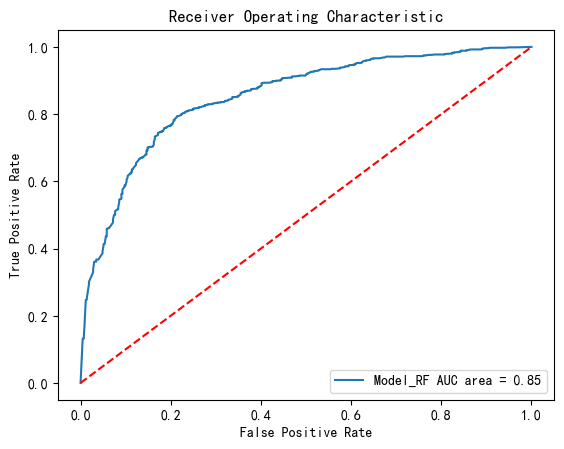

In [19]:
# 初始化存储所有型号的列表。第一个是 RF。
models = [{"label": "Model_RF", "model": model_RF}]
# 绘制roc曲线
plot_roc_curves_for_models(models, static_test_x, static_test_y);

#### 支持向量分类器 ¶

在这里，我们使用径向基函数核（也称为平方指数核）训练 SVM。有关更多信息，请参阅 sklearn RBF 内核。

In [20]:
# 指定模型
model_SVM = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)

# 将模型与单个分割模型相匹配
performance_measures = model_training_and_validation(model_SVM, "SVM", splits)

Sensitivity: 0.93
Specificity: 0.57
AUC: 0.87


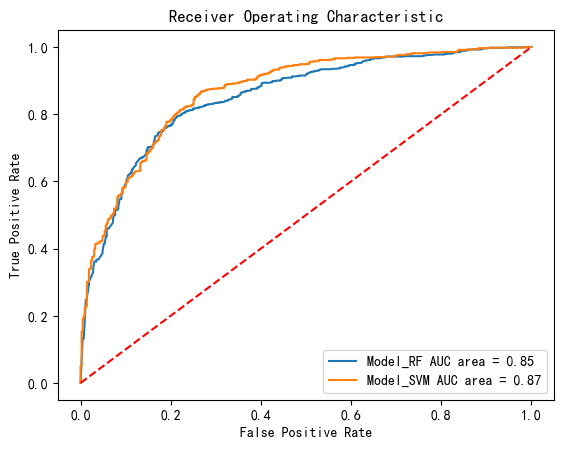

In [21]:
# 添加 SVM 模型
models.append({"label": "Model_SVM", "model": model_SVM})
# 绘制roc曲线
plot_roc_curves_for_models(models, static_test_x, static_test_y);

#### 神经网络分类器 ¶

我们在这里尝试的最后一种方法是神经网络模型。我们训练一个有 2 层的 MLPClassifier（多层感知器分类器）：第一层有 5 个神经元，第二层有 3 个神经元。和以前一样，我们进行交叉验证过程并绘制结果。有关 MLP 的更多信息，请参阅 sklearn MLPClassifier。

In [22]:
# 指定模型
# 设置20层
model_ANN = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=SEED)

# 创建一个具有20层隐藏层的MLP分类器，每层有10个神经元
# 注意：这个例子中的层数和神经元数量可能对于实际应用来说过大或过小，需要根据具体问题进行调整
# model_ANN = MLPClassifier(hidden_layer_sizes=(10,)*10, random_state=SEED)
# 单分裂上的模型拟合
performance_measures = model_training_and_validation(model_ANN, "ANN", splits)

Sensitivity: 0.87
Specificity: 0.54
AUC: 0.80


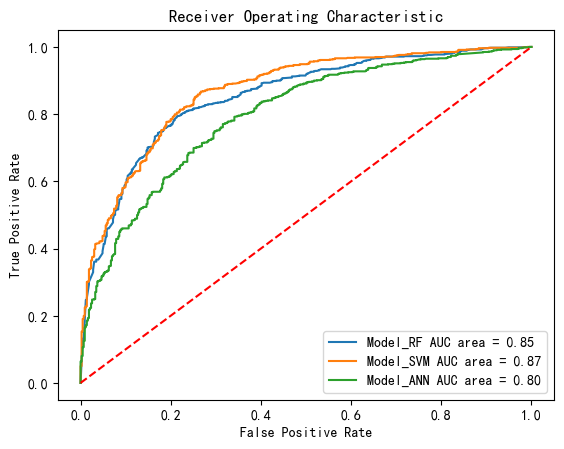

In [23]:
# 添加ANN模型
models.append({"label": "Model_ANN", "model": model_ANN})
# 绘制roc曲线
plot_roc_curves_for_models(models, static_test_x, static_test_y, True);

我们的模型对所有测量值都显示出非常好的值（参见 AUC），因此似乎具有预测性。

#### 交叉验证 ¶

接下来，我们将使用三种不同的模型进行交叉验证实验。因此，我们定义了一个辅助函数，用于交叉验证循环中的机器学习模型训练和验证。

In [24]:
def crossvalidation(ml_model, df, n_folds=5, verbose=False):
    """
    交叉验证循环中的机器学习模型训练和验证。
    参数
    ----------
    ml_model: sklearn 模型对象
    要训练的机器学习模型。
    df: pd.DataFrame
    包含 SMILES 及其相关活动标签的数据集。
    n_folds：int，可选
    用于交叉验证的折叠数。
    verbose: bool, 可选
    打印性能指标。
    返回
    -------
    无
    """
    t0 = time.time()
    # 对k - fold交叉验证的指标进行洗牌
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # 每个交叉验证折中的结果
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = []

    # 循环
    for train_index, test_index in kf.split(df):
        # clone model -- we want a fresh copy per fold!
        fold_model = clone(ml_model)
        # 训练

        # 将指纹和标签转换为列表
        train_x = df.iloc[train_index].fp.tolist()
        train_y = df.iloc[train_index].active.tolist()

        # 拟合模型
        fold_model.fit(train_x, train_y)

        # 测试

        # 将指纹和标签转换为列表
        test_x = df.iloc[test_index].fp.tolist()
        test_y = df.iloc[test_index].active.tolist()

        # 遍历每一个
        accuracy, sens, spec, auc = model_performance(fold_model, test_x, test_y, verbose)

        # 保存结果
        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    # 打印结果统计
    print(
        f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
        f"and std : {np.std(acc_per_fold):.2f} \n"
        f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
        f"and std : {np.std(sens_per_fold):.2f} \n"
        f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
        f"and std : {np.std(spec_per_fold):.2f} \n"
        f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
        f"and std : {np.std(auc_per_fold):.2f} \n"
        f"Time taken : {time.time() - t0:.2f}s\n"
    )

    return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

**交叉验证**

我们现在应用交叉验证并显示所有三个 ML 模型的统计数据。在现实条件下，交叉验证通常应用 5 次或更多，但出于性能考虑，我们将其减少到 20 次。您可以更改下面此单元格中 `N_FOLDS` 的值。

In [25]:
N_FOLDS = 20

注意：下一个单元格需要很长时间才能执行

In [26]:
for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    crossvalidation(model["model"], compound_df, n_folds=N_FOLDS)


Model_RF
Mean accuracy: 0.80 	and std : 0.03 
Mean sensitivity: 0.89 	and std : 0.03 
Mean specificity: 0.61 	and std : 0.05 
Mean AUC: 0.86 	and std : 0.02 
Time taken : 14.66s


Model_SVM
Mean accuracy: 0.81 	and std : 0.02 
Mean sensitivity: 0.92 	and std : 0.03 
Mean specificity: 0.59 	and std : 0.05 
Mean AUC: 0.86 	and std : 0.02 
Time taken : 333.15s


Model_ANN
Mean accuracy: 0.75 	and std : 0.02 
Mean sensitivity: 0.84 	and std : 0.03 
Mean specificity: 0.57 	and std : 0.05 
Mean AUC: 0.79 	and std : 0.03 
Time taken : 53.33s



我们研究使用 Morgan 指纹而不是 MACCS 密钥编码的分子的交叉验证性能。

In [27]:
# 重置数据帧
compound_df = chembl_df.copy()

In [28]:
# 使用半径为3的Morgan指纹
compound_df["fp"] = compound_df["smiles"].apply(smiles_to_fp, args=("morgan3",))
compound_df.head(3)

,molecule_chembl_id,smiles,pIC50,active,fp
0,CHEMBL5189340,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL429743,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,1.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL5186748,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


注意：下一个单元格需要很长时间才能执行

In [29]:
# 保存数据
compound_df.to_csv(f"{DATA}/chembl_morgan3.csv", index=False)

In [ ]:
for model in models:
    if model["label"] == "Model_SVM":
        # SVM具有超慢的长指纹
        # 并将具有类似于RF的性能
        # 我们可以在这个测试中跳过它，但如果你想的话
        # 运行它，随意将'继续'替换为'pass'
        pass
    print("\n=======")
    print(model["label"])
    crossvalidation(model["model"], compound_df, n_folds=N_FOLDS)

## 讨论 ¶

- 哪种模型在我们的数据集上表现最好，为什么？
  - 所有三个模型在我们的数据集上都表现得（非常）好。最好的模型是随机森林和支持向量机模型，其平均 AUC 约为 90%。我们的神经网络显示的结果略低。
  - 随机森林和支持向量机模型表现最佳可能有多种原因。我们的数据集可以通过一些简单的树状决策或径向基函数轻松地在活动/非活动状态下分离。因此，指纹中不存在如此复杂的模式来进行这种分类。
  - 人工神经网络性能稍差的一个原因可能是用于训练模型的数据太少。
  - 此外，始终建议使用另一个外部验证集来进行模型评估。
- MACCS 是正确的选择吗？
  - 显然，MACCS 很好地开始训练和验证模型，看看是否可以进行分类。
  - 然而，与其他密钥（2048 位）相比，MACCS 密钥相当短（166 位），例如摩根指纹。如上一次模拟所示，较长的指纹有助于学习过程。使用 Morgan 指纹，所有测试模型的表现都稍好一些（参见平均 AUC 增加）。

In [ ]:
# 绘制交叉验证结果 (AUC)
fig, ax = plt.subplots(figsize=(10, 10))
for model in models:
    if model["label"] == "Model_SVM":
        # SVM具有超慢的长指纹
        # 并将具有类似于RF的性能
        # 我们可以在这个测试中跳过它，但如果你想的话
        # 运行它，随意将'继续'替换为'pass'
        pass
    # 绘制交叉验证结果
    cv_results = crossvalidation(model["model"], compound_df, n_folds=N_FOLDS, verbose=False)
    ax.plot(cv_results[3], label=model["label"])
ax.set_xlabel("Number of folds")
ax.set_ylabel("AUC")
ax.set_title("Cross-validation results")
ax.legend(loc="lower right")
# Save plot
fig.savefig(f"{DATA}/cross_validation_results", dpi=300, bbox_inches="tight", transparent=True)